# Disturbance Example Notebook 

This notebook will describe how to setup an environment with a disturbance.

In [1]:
from pcgym import make_env
import numpy as np 
from stable_baselines3 import PPO

First create a baseline environment

In [2]:
# Enter required setpoints for each state.
T = 26
nsteps = 100
SP = {
    'Ca': [0.85 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
}

In [3]:
# Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}

# Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}

r_scale ={
    'Ca': 1e3 #Reward scale for each state
}
env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, # Setpoint
    'o_space' : observation_space, # Observation space
    'a_space' : action_space, # Action space
    'x0': np.array([0.8,330,0.8]), # Initial conditions 
    'model': 'cstr', # Select the model
    'r_scale': r_scale, # Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'normalise_a': True, # Normalise the actions
    'normalise_o':True, # Normalise the states,
    'noise':True, # Add noise to the states
    'integration_method': 'casadi', # Select the integration method
    'noise_percentage':0.001, # Noise percentage

    
}
env = make_env(env_params)

c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Then we can check what disturbance variables are available. For the CSTR, $T_i$ and $Ca_F$ correspond to the inlet temperature and concentration of species A.

In [4]:
env.model.info()

{'parameters': {'q': 100,
  'V': 100,
  'rho': 1000,
  'C': 0.239,
  'deltaHr': -50000.0,
  'EA_over_R': 8750,
  'k0': 72000000000.0,
  'UA': 50000.0,
  'Ti': 350,
  'Caf': 1,
  'states': ['Ca', 'T'],
  'inputs': ['Tc'],
  'disturbances': ['Ti', 'Caf'],
  'uncertainties': None},
 'states': ['Ca', 'T'],
 'inputs': ['Tc'],
 'disturbances': ['Ti', 'Caf'],
 'uncertainties': []}

Then we update the environment definition and make a new environment with a disturbance to the inlet Temperature.

In [5]:
lambda_ = lambda x: np.random.normal(335, 5, nsteps)

In [6]:
lambda_ = lambda x: np.random.normal(335, 5, nsteps)
disturbance_dist = {'Caf':lambda_}  

disturbance_space ={
  'low': np.array([320]),
  'high': np.array([350])
}
env = make_env({**env_params,'disturbance_bounds':disturbance_space, 'disturbance_distribution':disturbance_dist})

In [7]:
nsteps_learning = 1e4
PPO_policy = PPO('MlpPolicy', env, verbose=1,learning_rate=0.001).learn(nsteps_learning)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


[330.83719005487296]
[335.9783552651225]
[341.7515444799328]
[336.84787636427035]
[329.10585293510724]
[328.1300214159005]
[335.33049094189795]
[331.0819036159214]
[331.26786294446595]
[332.28682893379033]
[334.49620232661454]
[326.1874801421668]
[339.07421774855095]
[333.449533083712]
[334.3003597820814]
[326.0679177433924]
[332.826912492466]
[331.4879263269377]
[330.68474398978213]
[331.18162485344294]
[337.3849437979222]
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 99        |
|    ep_rew_mean     | -7.59e+04 |
| time/              |           |
|    fps             | 1225      |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 2048      |
----------------------------------
[341.7775351933771]
[335.1750219757602]
[340.03511258223455]
[343.7397727491726]
[333.57198863972246]
[331.3292269651543]
[342.98105810940547]
[334.0937125079296]
[335.6181246596394]
[332.8086624416262]
[328.8552193224355]

CasADi - 2025-01-28 15:25:18 WARNING("S:nlp_g failed: Inf detected for output g, at (row 4, col 0).") [.../casadi/core/oracle_function.cpp:393]
CasADi - 2025-01-28 15:25:18 WARNING("S:nlp_g failed: Inf detected for output g, at (row 4, col 0).") [.../casadi/core/oracle_function.cpp:393]
CasADi - 2025-01-28 15:25:18 WARNING("S:nlp_g failed: Inf detected for output g, at (row 2, col 0).") [.../casadi/core/oracle_function.cpp:393]
CasADi - 2025-01-28 15:25:18 WARNING("S:nlp_g failed: Inf detected for output g, at (row 10, col 0).") [.../casadi/core/oracle_function.cpp:393]
CasADi - 2025-01-28 15:25:18 WARNING("S:nlp_g failed: Inf detected for output g, at (row 4, col 0).") [.../casadi/core/oracle_function.cpp:393]
CasADi - 2025-01-28 15:25:18 WARNING("S:nlp_g failed: Inf detected for output g, at (row 10, col 0).") [.../casadi/core/oracle_function.cpp:393]
CasADi - 2025-01-28 15:25:18 WARNING("S:nlp_g failed: Inf detected for output g, at (row 4, col 0).") [.../casadi/core/oracle_function

[329.20522957736466]
[340.50681744999383]


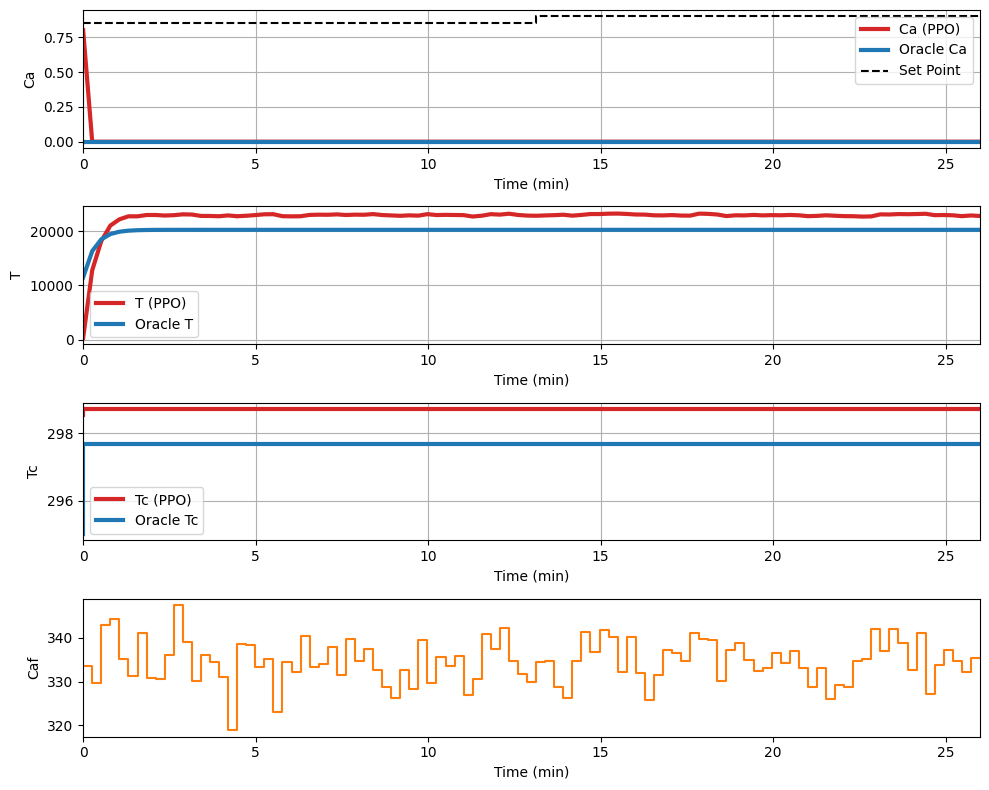

In [8]:
evaluator, data = env.plot_rollout({'PPO': PPO_policy}, oracle = True, reps = 2)